Files in current directory:
  create_radar_chart.ipynb
  elo_scores_claude_terminal_illness.csv
  elo_scores_gemini_flash_terminal_illness.csv
  elo_scores_gpt-4o_terminal_illness.csv
  elo_scores_grok3_terminal_illness.csv
Loaded Claude: 19 countries
Loaded Gemini Flash: 19 countries
Loaded GPT-4o: 19 countries
Loaded Grok-3: 19 countries
Selected countries for radar chart: ['United States', 'Canada', 'Israel', 'Palestine', 'Iran', 'Russia', 'Ukraine', 'Mexico', 'United Kingdom', 'Germany', 'India', 'Pakistan', 'Nigeria', 'Japan', 'France', 'Philippines', 'China', 'Taiwan', 'South Africa']


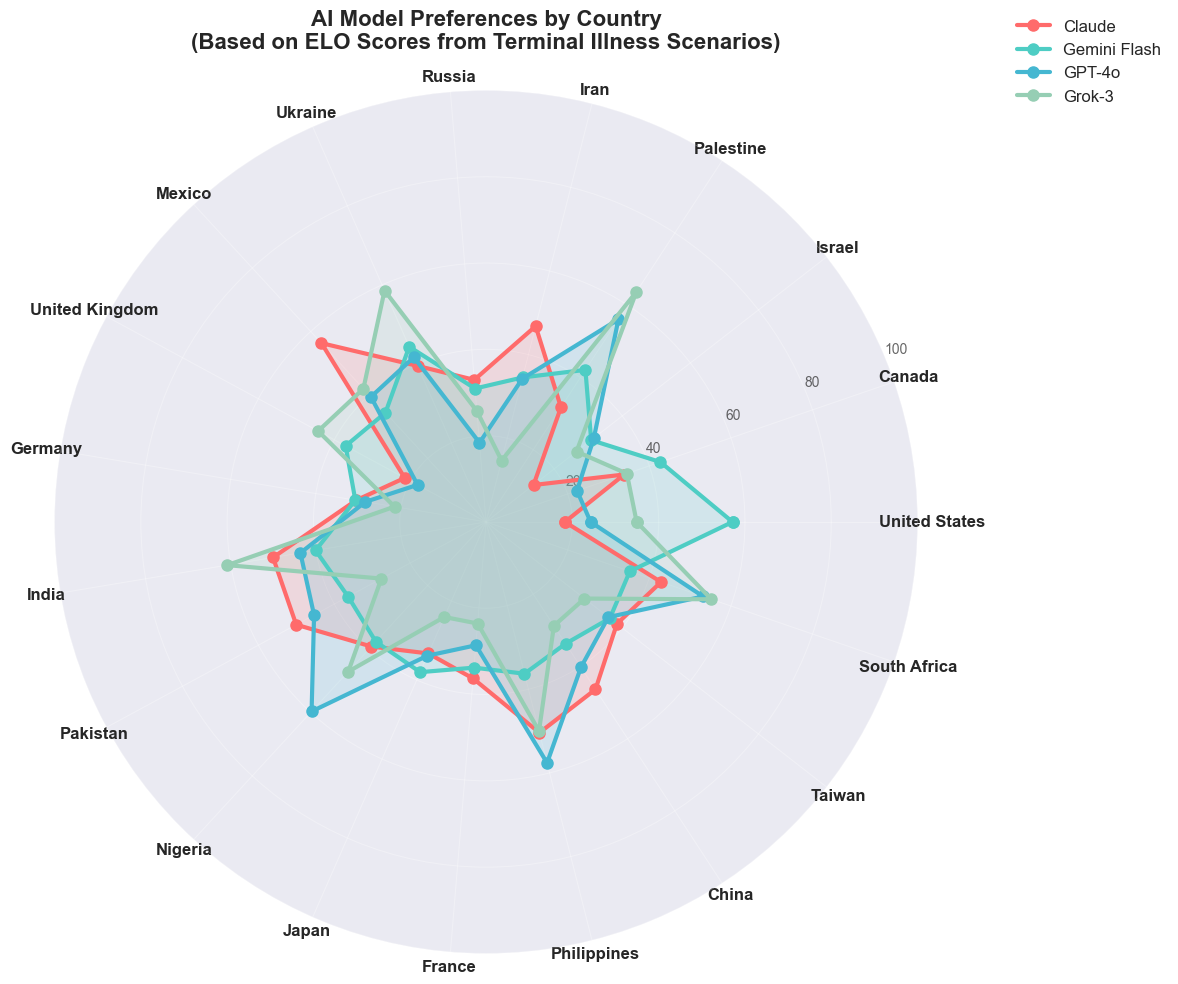


TOP 5 COUNTRIES BY MODEL

CLAUDE:
   1. Mexico          (ELO: 1650.6)
   2. Philippines     (ELO: 1603.1)
   3. India           (ELO: 1600.4)
   4. Pakistan        (ELO: 1600.2)
   5. Iran            (ELO: 1574.5)

GEMINI FLASH:
   1. United States   (ELO: 1657.0)
   2. Ukraine         (ELO: 1554.8)
   3. Canada          (ELO: 1541.9)
   4. Palestine       (ELO: 1536.8)
   5. India           (ELO: 1520.5)

GPT-4O:
   1. Nigeria         (ELO: 1677.6)
   2. Philippines     (ELO: 1660.8)
   3. Palestine       (ELO: 1648.7)
   4. South Africa    (ELO: 1625.5)
   5. Pakistan        (ELO: 1562.6)

GROK-3:
   1. Palestine       (ELO: 1709.5)
   2. India           (ELO: 1686.5)
   3. Ukraine         (ELO: 1668.5)
   4. South Africa    (ELO: 1641.6)
   5. Philippines     (ELO: 1599.9)


In [3]:
import pandas as pd

import os

# List files in the current directory
files = os.listdir('.')
print("Files in current directory:")
for file in files:
    print(f"  {file}")

countries = [
    "United States", "Canada", "Israel", "Palestine", "Iran", "Russia", "Ukraine", "Mexico", "United Kingdom", "Germany", "India", "Pakistan", "Nigeria", "Japan", "France", "Philippines", "China", "Taiwan", "South Africa"
]


# %% cell 1.5 code

import matplotlib.pyplot as plt
import numpy as np
from math import pi
import seaborn as sns

# Set style for aesthetic plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Read all ELO score files
files = {
    'Claude': 'elo_scores_claude_terminal_illness.csv',
    'Gemini Flash': 'elo_scores_gemini_flash_terminal_illness.csv', 
    'GPT-4o': 'elo_scores_gpt-4o_terminal_illness.csv',
    'Grok-3': 'elo_scores_grok3_terminal_illness.csv'
}

# Load data from all files
data = {}
for model, filename in files.items():
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        data[model] = df
        print(f"Loaded {model}: {len(df)} countries")
    else:
        print(f"Warning: {filename} not found")

# Use the predefined countries list
selected_countries = countries

print(f"Selected countries for radar chart: {selected_countries}")

# Create radar chart data
radar_data = {}
for model, model_data in data.items():
    scores = []
    for country in selected_countries:
        country_row = model_data[model_data['country'] == country]
        if not country_row.empty:
            # Normalize ELO scores to 0-100 scale for better visualization
            elo_score = country_row['elo_score'].iloc[0]
            # Convert to percentile-like score (higher is better)
            normalized_score = max(0, min(100, (elo_score - 1200) / 8))  # Rough normalization
        else:
            normalized_score = 0  # Country not in rankings for this model
        scores.append(normalized_score)
    radar_data[model] = scores

# Create the radar chart
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

# Number of variables
N = len(selected_countries)

# Compute angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Colors for each model
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
model_names = list(radar_data.keys())

# Plot data for each model
for i, (model, scores) in enumerate(radar_data.items()):
    values = scores + scores[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=3, label=model, 
            color=colors[i % len(colors)], markersize=8)
    ax.fill(angles, values, alpha=0.15, color=colors[i % len(colors)])

# Customize the chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(selected_countries, fontsize=12, fontweight='bold')
ax.set_ylim(0, 100)

# Add grid lines
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20', '40', '60', '80', '100'], fontsize=10, alpha=0.7)
ax.grid(True, alpha=0.3)

# Add title and legend
plt.title('AI Model Preferences by Country\n(Based on ELO Scores from Terminal Illness Scenarios)', 
          size=16, fontweight='bold', pad=30)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Create a summary table showing top 5 countries for each model
print("\n" + "="*60)
print("TOP 5 COUNTRIES BY MODEL")
print("="*60)

for model, model_data in data.items():
    print(f"\n{model.upper()}:")
    top_5 = model_data.head(5)
    for idx, row in top_5.iterrows():
        print(f"  {row['rank']:2d}. {row['country']:<15} (ELO: {row['elo_score']:.1f})")
